# Choosing The Best Method for New Office Stationery Sales


## 📝 Task List

- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## Data validation

The dataset contains **15000 rows and 8 columns** before cleaning and validation. I have validated all the columns against the criteria in the dataset table:

- week: 6 integer values from 1 to 6 without missing values. No cleaning is needed.
- sales_method: 23 misspelled values and 10 lowercase values were corrected. 3 categories remain without missing values.
- customer_id: 15000 unique object values without missing values. No cleaning is needed.
- nb_sold: 10 integer values from 7 to 16 without missing values. No cleaning is needed.
- revenue: 1,074 missing values were filled with the most frequent value in each sales_method category.
- years_as_customer: 2 values greater than 40 were replaced with 40. Since the company was founded in 1984, as of 2024, it is not possible to have customers with a tenure of over 40 years. Integer values from 0 to 40 remain without missing values.
- nb_site_visits: Integer values from 12 to 41 without missing values. No cleaning is needed.
- state: 50 object values without missing values. No cleaning is needed.

After the data validation, the dataset contains **15000 rows and 8 columns** without missing values.

In [124]:
import pandas as pd

# Read the product_sales.csv file into a DataFrame df, and display the first 5 rows
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [125]:
# Check the shape of dataframe, the presence of null values, and the datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [126]:
# Check and count the number of each sales method
print(df['sales_method'].value_counts())

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64


In [127]:
# Correct misspelled and lowercase values in the 'sales_method' column
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'Email + Call',
    'email': 'Email'
})

# Check and Count the number of values in the 'sales_method' column
print(df['sales_method'].value_counts())

Email           7466
Call            4962
Email + Call    2572
Name: sales_method, dtype: int64


In [128]:
# Check the number of unique values in 'customer_id' column.
df['customer_id'].nunique()

15000

In [129]:
# Check unique values in 'nb_sold' column
df['nb_sold'].unique()

array([10, 15, 11,  9, 13,  8, 12,  7, 14, 16])

In [130]:
# Count the number of null values in 'revenue' column
df['revenue'].isnull().sum()

1074

In [131]:
# Calculate the median for each sales method
median_groupby_sales_method = df.groupby('sales_method')['revenue'].median()
print(median_groupby_sales_method)

sales_method
Call             49.07
Email            95.58
Email + Call    184.74
Name: revenue, dtype: float64


In [132]:
# Fill the null values with the medians and verify that all missing values have been addressed
df['revenue'] = df['revenue'].fillna(df['sales_method'].map(median_groupby_sales_method))
df['revenue'].isnull().sum()

0

In [133]:
# Check rows where the 'years_as_customer' value is incorrectly recorded as greater than 40
df[df['years_as_customer'] > 40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [134]:
# Replace values greater than 40 with 40, and verify that no values greater than 40 remain
df.loc[df['years_as_customer'] > 40, 'years_as_customer'] = 40
(df['years_as_customer'] > 40).sum()

0

In [135]:
# Display the first 5 rows again to confirm that all validation and cleaning have been completed
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,95.58,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,95.58,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [136]:
# Display the presence of null values and the datatypes of each column again for the same reason.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


## Exploratory Analysis

### The number of customers for each sales method
Based on the bar chart, **Email** is the most common sales method, followed by **Call**, and the least common method is **Email + Call**. The current sales strategy is focused on **Email**, and the proportion of using a combined method **Email + Call** is only about 17%

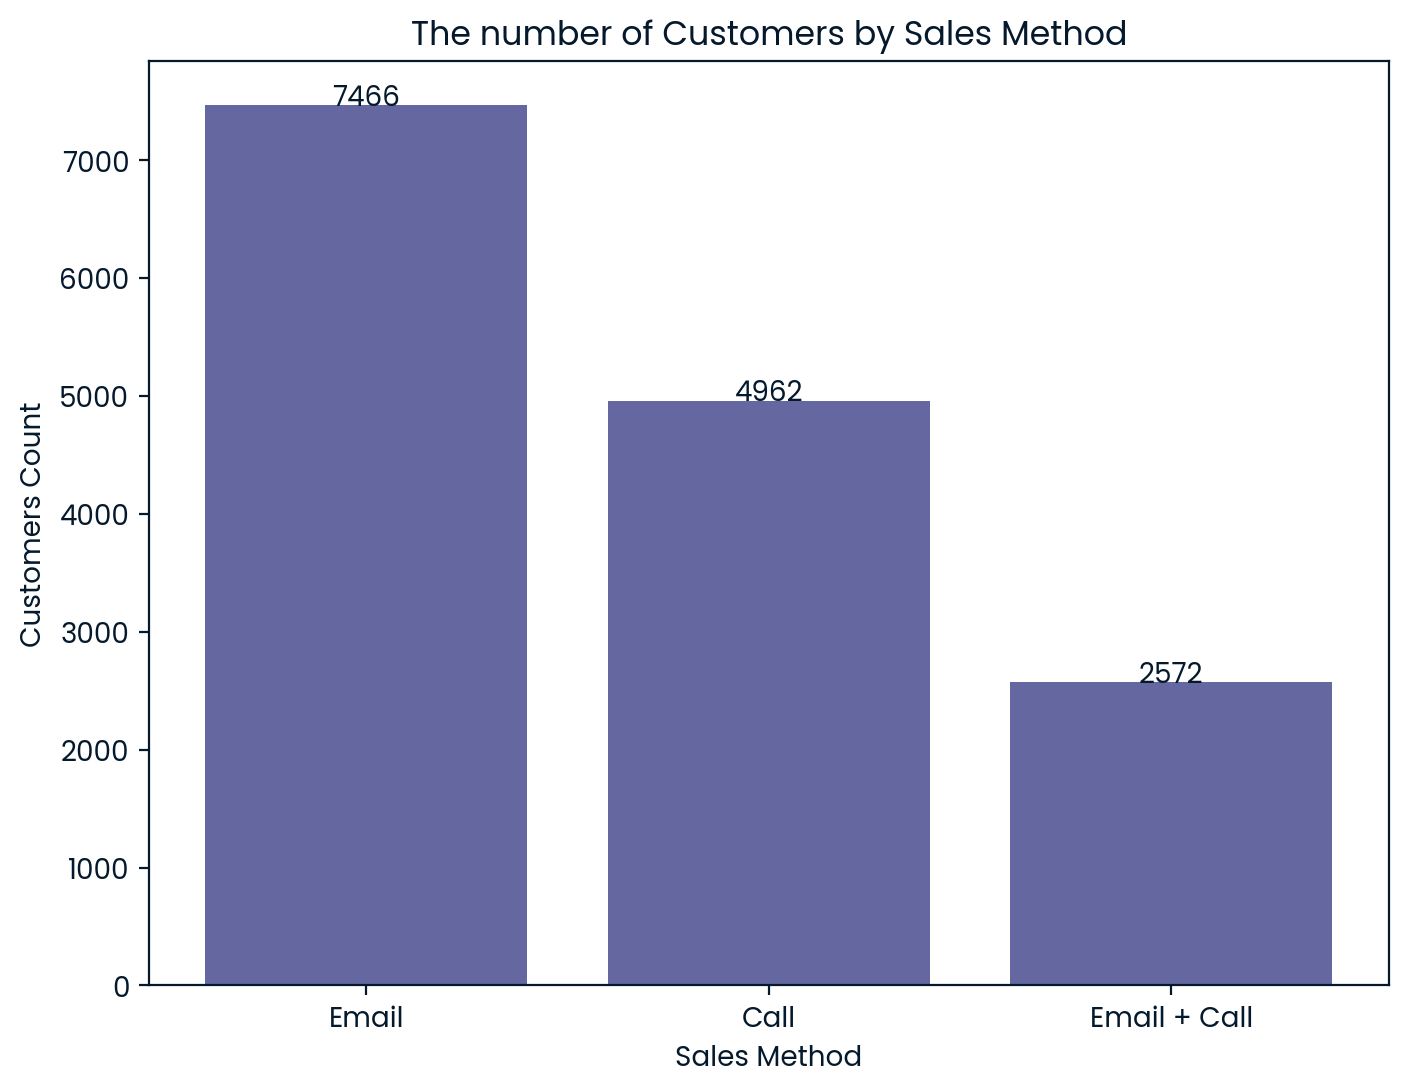

 Email: 49.77%
 Call: 33.08%
 Email + Call: 17.15%


In [137]:
import matplotlib.pyplot as plt

method_counts = df['sales_method'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(method_counts.index, method_counts.values)

# Add numbers on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', ha='center')

# Chart details
plt.title('The number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Customers Count')

plt.show()

print(f" Email: {7466/15000 * 100:.2f}%")
print(f" Call: {4962/15000 * 100:.2f}%")
print(f" Email + Call: {2572/15000 * 100:.2f}%")

### The distribution of overall revenue and for each sales method
According to the histogram, revenue is primarily concentrated around 50 and 100, with a moderate distribution around 180. This distribution can also be represented with a single boxplot.

Next, the multiple boxplots show that each sales method exhibits a different revenue distribution. The median for **Call** is approximately 50, for **Email** it is around 90, and for **Email + Call**, it is about 180. In summary, the revenue distribution is distinctly differentiated by sales method

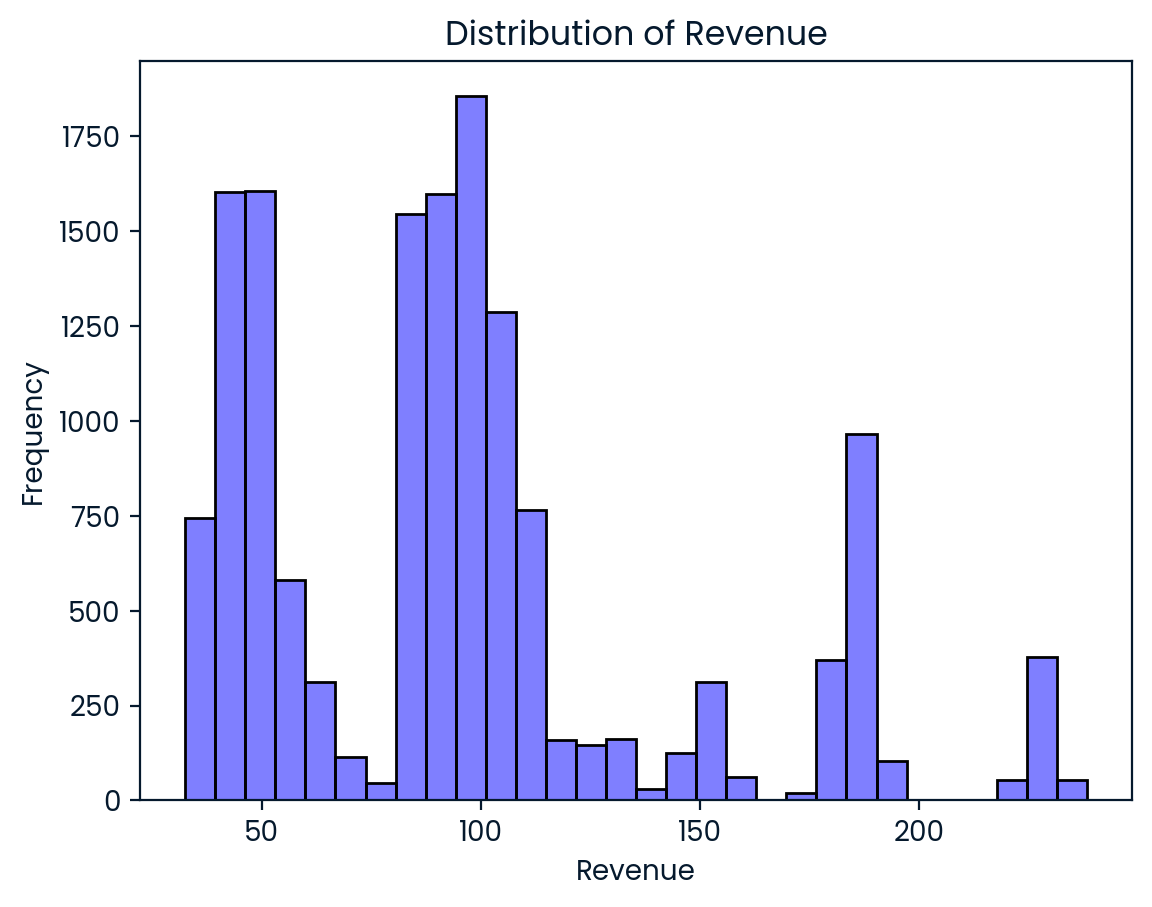

In [138]:
import seaborn as sns

sns.histplot(df['revenue'], bins=30, kde=False, color='blue', alpha=0.5)

plt.title("Distribution of Revenue")
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.show()

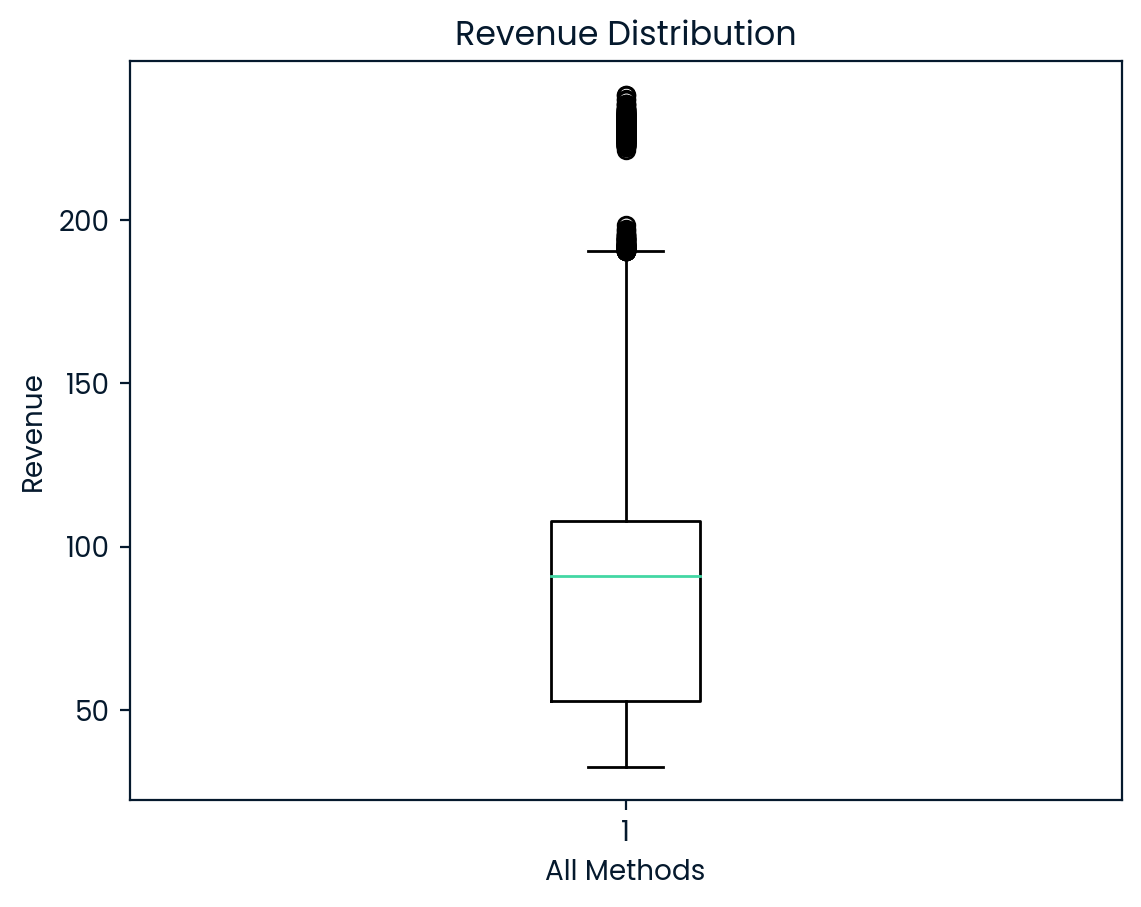

In [139]:
plt.boxplot(df['revenue'])
plt.xlabel('All Methods')
plt.ylabel('Revenue')
plt.title('Revenue Distribution')
plt.suptitle('')
plt.show()

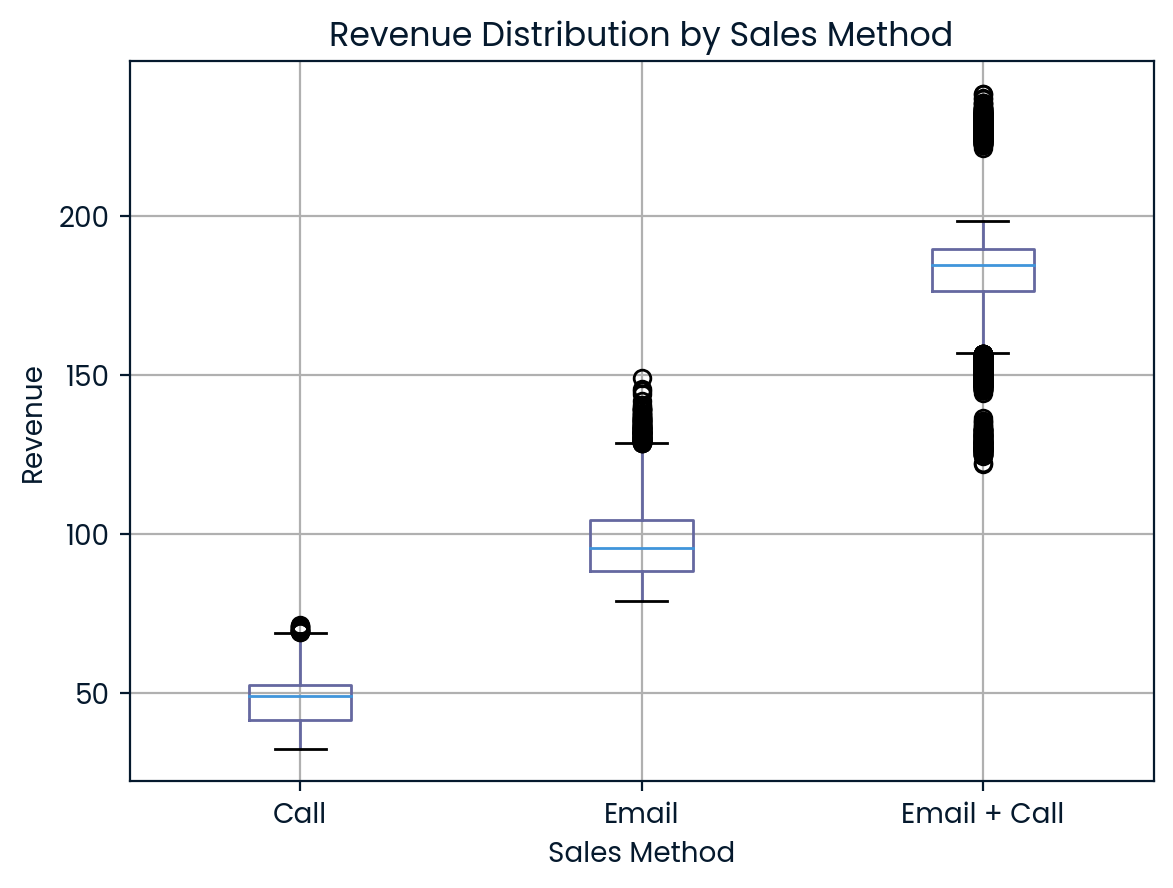

In [140]:
df.boxplot(column='revenue', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.title('Revenue Distribution by Sales Method')
plt.suptitle('')
plt.show()

### The difference in revenue over time for each of the methods
The line chart indicates that **Email** line initially shows significantly high revenue but exhibits a decreasing trend over time. **Call** line shows its revenue increasing slowly but remaining low overall. In contrast, **Email + Call** line starts with the lowest revenue initially but demonstrates a substantial increasing trend up to week 5, followed by a slight decrease in week 6, but it still remains at a high value.

Since the number of customers varies across sales methods, examining the average revenue per customer (by dividing the revenue by the number of customers) for each sales method will help in understanding the data more clearly. All three lines show an increasing trend in average revenue over time, but the amount of increase is greatest for **Email + Call**, followed by **Email**, and then **Call**."

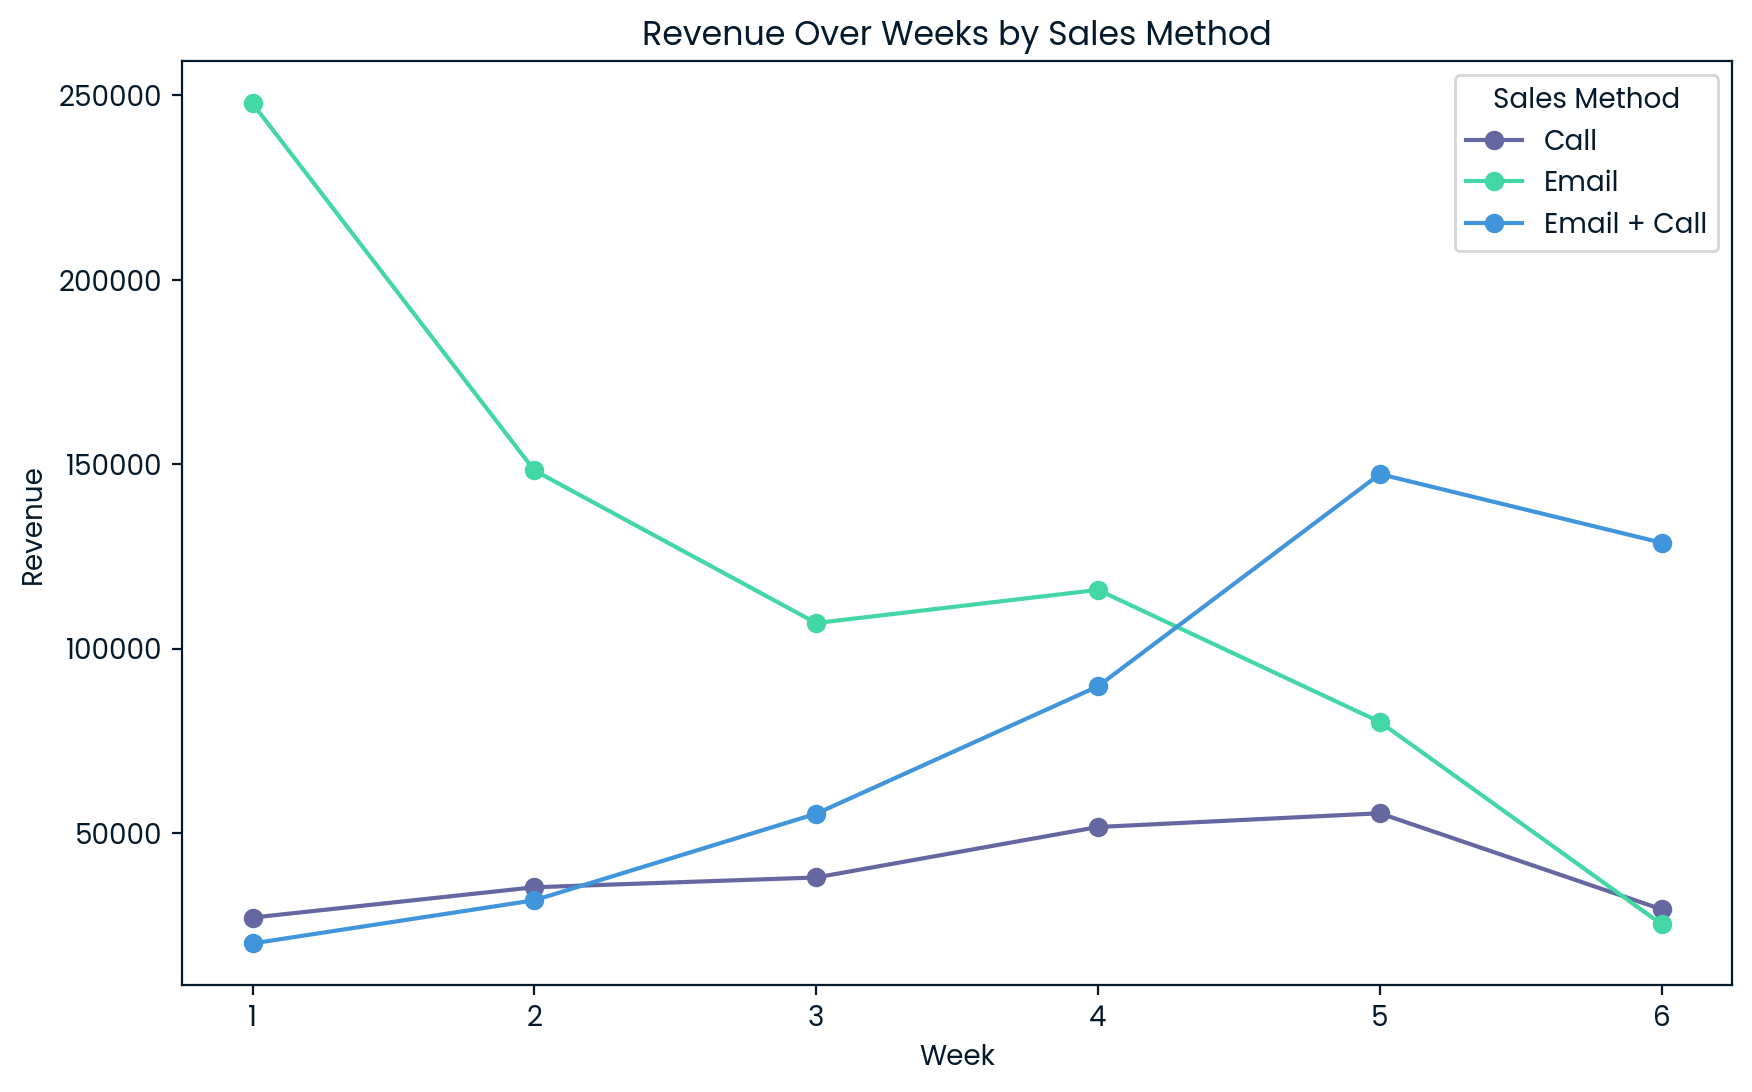

In [141]:
grouped = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

plt.figure(figsize=(10, 6))
for method in grouped.columns:
    plt.plot(grouped.index, grouped[method], marker='o', label=f'{method}')

plt.title('Revenue Over Weeks by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.xticks(grouped.index)
plt.yticks()
plt.legend(title='Sales Method')

plt.show()

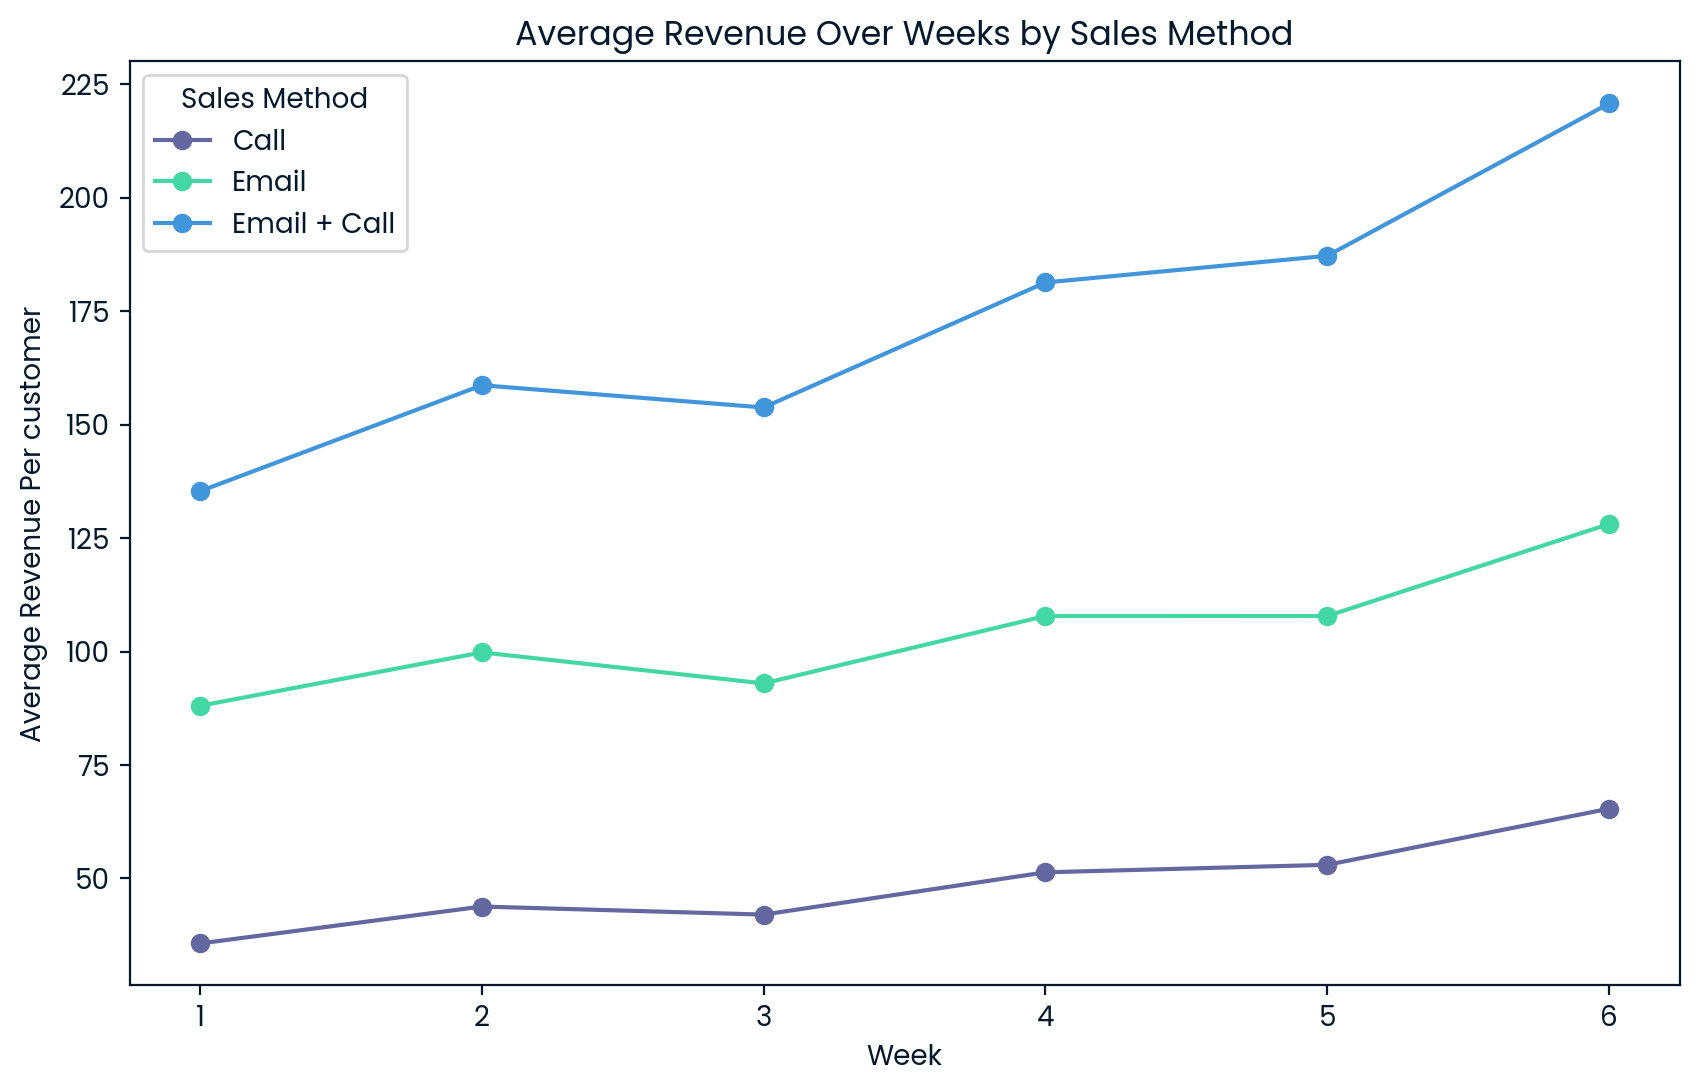

In [142]:
grouped = df.groupby(['week', 'sales_method'])['revenue'].mean().unstack()

plt.figure(figsize=(10, 6))
for method in grouped.columns:
    plt.plot(grouped.index, grouped[method], marker='o', label=f'{method}')

plt.title('Average Revenue Over Weeks by Sales Method')
plt.xlabel('Week')
plt.ylabel('Average Revenue Per customer')
plt.xticks(grouped.index)
plt.yticks()
plt.legend(title='Sales Method')

plt.show()

### Other differences between the customers in each group
The median of new products sold for **Email + Call** is 12, compared to the median of 10 for both **Email** and **Call**. Additionally, the median of website visits for **Email + Call** is 27, which is greater than 25 for **Email** and 24 for **Call**. These two boxplots suggest that using the combined approach **Email + Call** may lead to an increase in website visits, which appears to positively influence the higher number of new products sold.

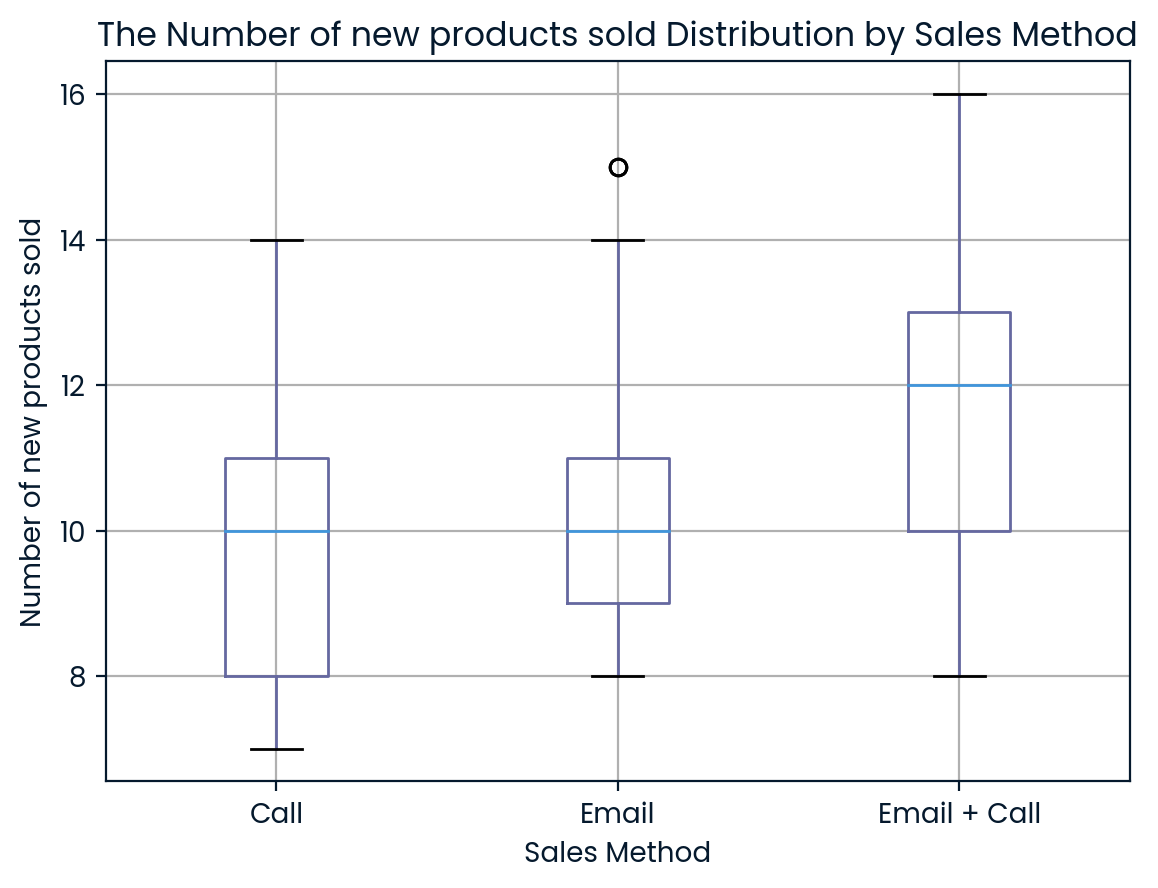

In [143]:
df.boxplot(column='nb_sold', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Number of new products sold')
plt.title('The Number of new products sold Distribution by Sales Method')
plt.suptitle('')
plt.show()

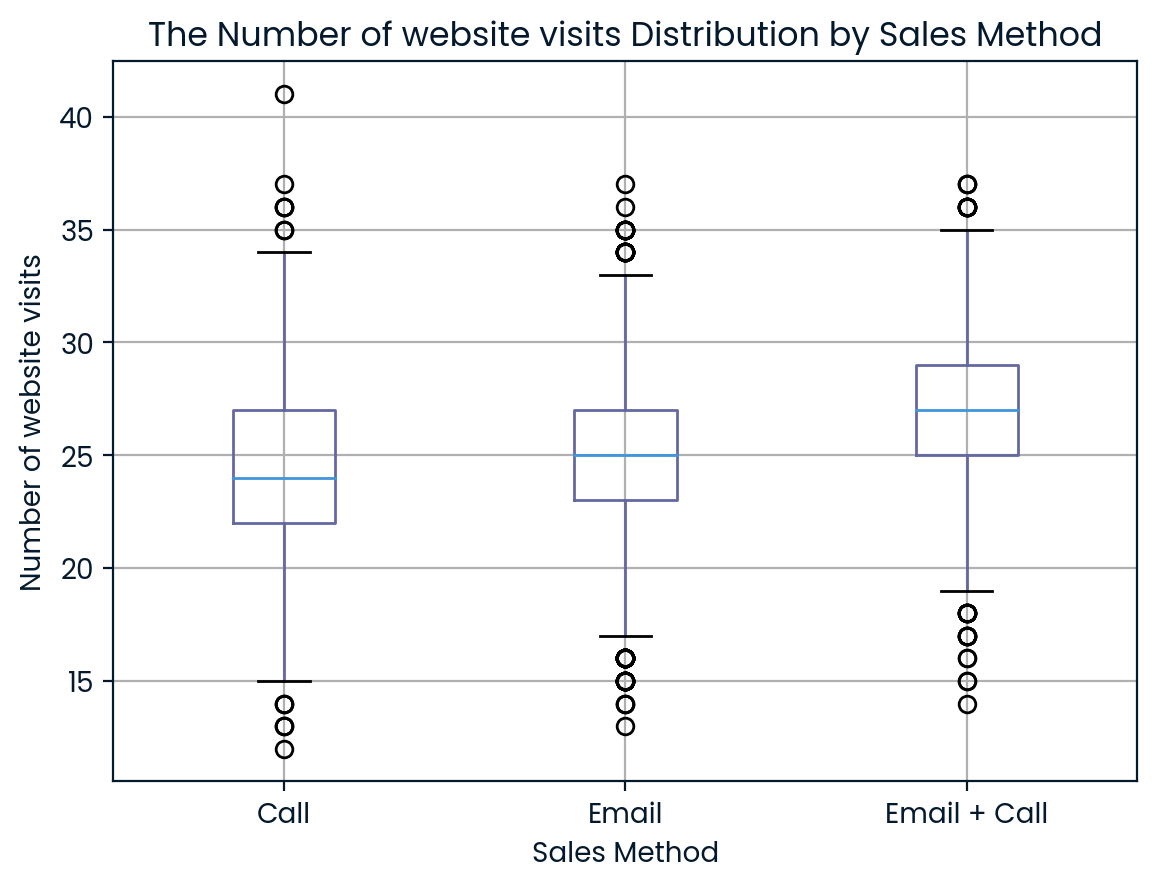

In [144]:
df.boxplot(column='nb_site_visits', by='sales_method')
plt.xlabel('Sales Method')
plt.ylabel('Number of website visits')
plt.title('The Number of website visits Distribution by Sales Method')
plt.suptitle('')
plt.show()

## Definition of a metric for the business to monitor
The sales team needs to determine the time required for each sales method to achieve similar revenue, while also establishing a metric to continuously monitor this. I would like to suggest a metric **sales_efficiency**. 

**sales_efficiency = (subtotal_revenue) / (customer_count x time_required)**

This metric is defined by considering the subtotal revenue for each sales method and the average time (in minutes) required to handle one customer. The **Email** requires very little work, but since each customer is contacted twice, it is assumed to take an average of 3 + 3 minutes. The **Call** takes an average of 30 minutes per customer. For the **Email + Call**, the Email portion requires little (but not very little) work for the team, so it is assumed to take around 5 minutes. Additionally, the Call portion takes an average of 10 minutes. Therefore, this method is estimated to take a total of 5 + 10 minutes.

As its intuitive name suggests, **sales efficiency** refers to the revenue generated per minute by each method.
When the sales team spends 1 minute on **Email**, they generate 16.17 in revenue. For **Email + Call**, 1 minute yields 12.25 in revenue. In contrast, spending 1 minute on **Call** earns only 1.59 in revenue.

As a result, **Email** is the most efficient sales method.

In [145]:
# Define the time required for each sales method
time_required = {
    'Email': 3+3,
    'Call': 30,
    'Email + Call': 5+10
}

# Group by sales method to calculate subtotal revenue and customer count rows
grouped = df.groupby('sales_method').agg(
    subtotal_revenue=('revenue', 'sum'),
    customer_count=('sales_method', 'count')
).reset_index()

# Add time required for each sales method
grouped['time_required'] = grouped['sales_method'].map(time_required)

# Calculate sales efficiency
grouped['sales_efficiency'] = (grouped['subtotal_revenue'] / (grouped['customer_count'] * grouped['time_required'])).round(2)

# Select sales method and sales efficiency to display the result
result = grouped[['sales_method', 'sales_efficiency']]

# Display the result
result

,sales_method,sales_efficiency
0,Call,1.59
1,Email,16.17
2,Email + Call,12.25


Another advantage of the metric is that by taking its reciprocal and multiplying it by the target revenue, it can also show the time required to achieve the same target for each method. For example, if the target revenue is 100, it would take 6.18 minutes with Email, 8.16 minutes with Email + Call, and 62.89 minutes with Call to achieve it.

In [146]:
target_revenue = 100
grouped['time_required_same_target'] = (target_revenue / grouped['sales_efficiency']).round(2)

reciprocal = grouped[['sales_method', 'time_required_same_target']]
reciprocal

,sales_method,time_required_same_target
0,Call,62.89
1,Email,6.18
2,Email + Call,8.16


## Final summary including recommendations that the business should undertake

- **Email** is the most efficient sales method, followed by **Email + Call** and then **Call**.  
- **Email** earns significant revenue during the initial phase of a new product launch but decreases over time.  
- **Email + Call** generates the highest average revenue per customer, followed by **Email** and then **Call**.
- **Email + Call** starts with lower revenue in the early stages of a new product launch but increases over time.  
- **Email + Call** positively impacts the number of website visits and new products sold.  
- **Call** has no advantages in terms of sales efficiency, average revenue per customer, or revenue trends.  

Thus, **Email** and **Email + Call** are better sales methods than **Call**.  
However, determining which of the two is the better method depends on the business context:  

### Case 1: Limited Workforce (Total Work Hours)  
If the sales team's total work hours are limited relative to the number of customers to handle, **Email** should be chosen. This ensures the highest time efficiency and maximum revenue, especially during the early stages of a new product launch.  

### Case 2: Limited Market (Customers)  
On the other hand, if the market size is fixed, and the sales team has sufficient total work hours to handle all customers, **Email + Call** should be chosen. Although it takes more time, this method allows for maximizing revenue per customer, which leads to the maximum total revenue.  

The statement "Despite the world becoming increasingly digital, there is still demand for notebooks, pens, and sticky notes" suggests that the office stationery business is most likely classified as **Case 2**.

### Conclusion:  
**Email + Call** is recommended as the best sales method.

It may take some time (within 6 weeks), but it can generate the highest revenue with reasonable time efficiency. Additionally, by utilizing both Email and Call for each customer, this method not only boosts the number of website visits and new products sold but also helps maintain better customer relationships.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation